In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df.columns=df.columns.str.strip()##that find the white space in your column name and remove it
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
##now u can see manny white space is there now we are removing white space
df['Classes'] = df['Classes'].str.strip().str.lower()

In [8]:
#now we are converting our classes column into numeric par
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [9]:
df.head(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
##now we are make dependent and independent feature
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
##train and test splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

feature selection based on correlation

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

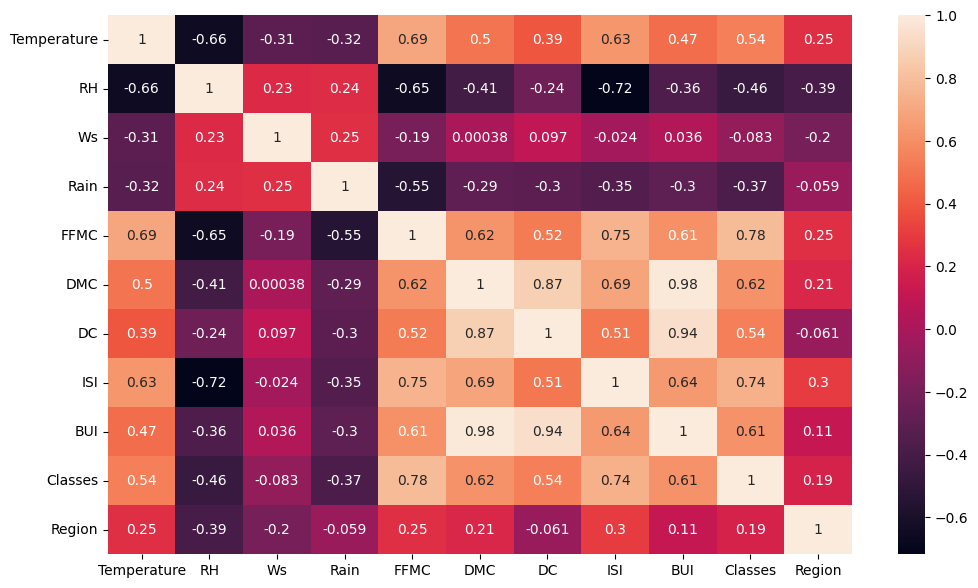

In [16]:
plt.figure(figsize=(12,7))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store columns with correlation above the threshold
    corr_matrix = dataset.corr()  # Calculate the correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of correlation is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Get the column name
                col_corr.add(colname)  # Add the column name to the set

    return col_corr


In [18]:
# corrleation threshold given by -- Domian experts
correlation(X_train,0.85)

{'BUI', 'DC'}

now we are going to drop this feature that has high correlation with other features(using thershold value with 0.85)

In [19]:
X_train.drop(['BUI','DC'],axis=1, inplace=True)
X_test.drop(['BUI','DC'],axis=1, inplace=True)

In [20]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [21]:
##standardlization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

now we use box plot to see the effect of standardization

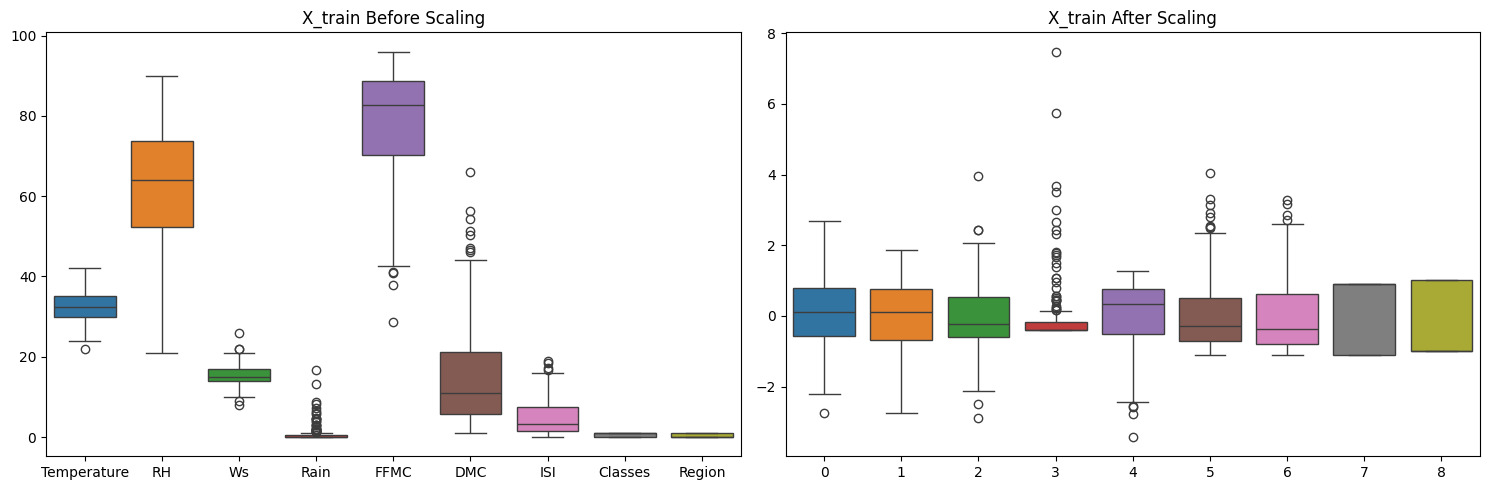

In [22]:
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Show the plots
plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()

lineare regression

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
##prediction part
y_pred=regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.7391885638204798


0.9607056657860651

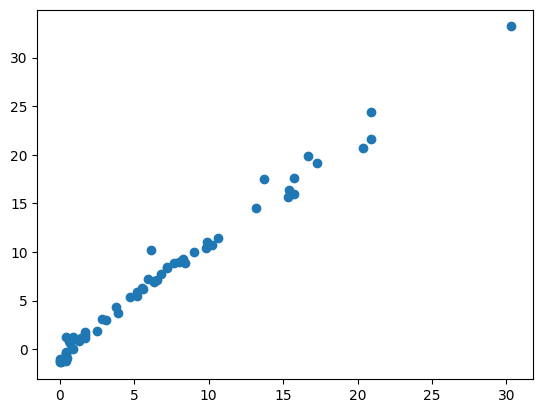

In [24]:
plt.scatter(y_test,y_pred)

Lasso regression

In [25]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
##prediction part
y_pred=lasso.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.358927403811667


0.9692970913627958

Ridge regression

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
##prediction part
y_pred=ridge.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.6975754626951076


0.9616458508455313

Elasticnet regression

In [27]:
from sklearn.linear_model import ElasticNet
EL=ElasticNet()
EL.fit(X_train_scaled,y_train)
##prediction part
y_pred=EL.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 4.064436888454822


0.9081701979826986

cross validation for Ridgh regression 

In [28]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
##prediction part
y_pred=ridgecv.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.6975754626951076


0.9616458508455313

crossvalidation for lasso regression

In [29]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train_scaled,y_train)
##prediction part
y_pred=lassocv.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.721235206913287


0.9611112947220234

Crossvalidation for ElasticNet

In [30]:
from sklearn.linear_model import ElasticNetCV
ELcv=ElasticNetCV()
ELcv.fit(X_train_scaled,y_train)
##prediction part
y_pred=ELcv.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

Mean Squared Error : 1.6125671690762826


0.9635664846226284

In [31]:
##cv is baically divide your training dataset into 5 diffreant part (train and validation) and in last they combain all this and gives yoou a avrage

In [32]:
##now after doing all the model we picking best model

our best model is lasso regression

In [33]:
scaler

StandardScaler()

In [34]:
lasso

Lasso()

In [35]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lasso,open('lasso.pkl','wb'))